(I only used Gemini to translate the original Korean text.)

This experiment focuses on the **model architecture** of AlexNet. Below is the description of each model variant:

* **exp1a (Baseline):** This model serves as the baseline and uses **no pre-training**.
* **exp1b:** This model is identical to exp1a, except that it utilizes a **pre-trained model**.
* **exp1c:** **Batch Normalization (BN)** layers were added immediately after **every Convolutional Neural Network (CNN) layer** in the AlexNet architecture.
* **exp1d:** A **Convolutional Block Attention Module (CBAM)** was inserted immediately before **every pooling layer** in the AlexNet architecture.
* **exp1e:** This model combines the modifications of exp1c and exp1d: **BN layers** were added after **every CNN layer**, and **CBAM modules** were added before **every pooling layer**.

The model that showed the lowest **Train loss** and the highest **best accuracy** was **exp1b**. However, a review of the bottom loss graph indicates that **exp1b** is **difficult to evaluate as stable learning** due to its volatility.

Therefore, excluding exp1b, we determined that **exp1e** represents the **optimal architecture**. This conclusion is based on exp1e having the **second-highest best accuracy** and exhibiting **stable convergence** in the test loss graph.

Both **exp1c** and **exp1e** show an intermittent tendency to spike high in their loss graphs. We attribute this phenomenon to the inherent characteristics of **Batch Normalization (BN)**, which often introduces occasional jumps or fluctuations in the loss during training.

In [17]:
import matplotlib.pyplot as plt
import train

In [19]:
exp1a_train, exp1a_val = train.main('configs/exp1_a.yaml')

--- Configuration ---
data:
  batch_size: 32
  num_classes: 4
  path: E:\school\2025_2\computerVision\poc_alexnet_2\data\poc_dataset
  preprocessing:
    name: resize
model:
  name: alexnet
  pretrained: false
run_name: exp1_01_resize
training:
  attention_lr: 0.0006
  device: cuda
  early_stopping_patience: 20
  epochs: 60
  learning_rate: 0.0001
  lr_scheduler:
    gamma: 0.1
    step_size: 10
  optimizer: Adam
  seed: 123
  weight_decay: 0.0001

---------------------
Using device: cuda
DataLoaders created successfully.
  - Preprocessing: resize
  - Train samples: 4155, Test samples: 1511
Model 'alexnet' created. Pretrained: False, Num classes: 4


Total Epochs:  90%|█████████ | 54/60 [32:17<03:35, 35.88s/it, Train Acc=0.7779, Val Acc=0.7862, Best Acc=0.7869 @ ep 35]


Early stopping triggered after 20 epochs with no improvement.
Epoch 1: New best model saved to saved_models/exp1_01_resize\best_model.pth (Accuracy: 0.2581)
Epoch 2: New best model saved to saved_models/exp1_01_resize\best_model.pth (Accuracy: 0.2919)
Epoch 3: New best model saved to saved_models/exp1_01_resize\best_model.pth (Accuracy: 0.3150)
Epoch 4: New best model saved to saved_models/exp1_01_resize\best_model.pth (Accuracy: 0.5625)
Epoch 6: New best model saved to saved_models/exp1_01_resize\best_model.pth (Accuracy: 0.6082)
Epoch 9: New best model saved to saved_models/exp1_01_resize\best_model.pth (Accuracy: 0.7022)
Epoch 11: New best model saved to saved_models/exp1_01_resize\best_model.pth (Accuracy: 0.7379)
Epoch 12: New best model saved to saved_models/exp1_01_resize\best_model.pth (Accuracy: 0.7551)
Epoch 13: New best model saved to saved_models/exp1_01_resize\best_model.pth (Accuracy: 0.7584)
Epoch 14: New best model saved to saved_models/exp1_01_resize\best_model.pth (A

In [20]:
exp1b_train, exp1b_val = train.main('configs/exp1_b.yaml')

--- Configuration ---
data:
  batch_size: 32
  num_classes: 4
  path: E:\school\2025_2\computerVision\poc_alexnet_2\data\poc_dataset
  preprocessing:
    name: resize
model:
  name: alexnet
  pretrained: true
run_name: exp1_02_pretrained
training:
  attention_lr: 0.0006
  device: cuda
  early_stopping_patience: 20
  epochs: 60
  learning_rate: 0.0001
  lr_scheduler:
    gamma: 0.1
    step_size: 10
  optimizer: Adam
  seed: 123
  weight_decay: 0.0001

---------------------
Using device: cuda
DataLoaders created successfully.
  - Preprocessing: resize
  - Train samples: 4155, Test samples: 1511
Model 'alexnet' created. Pretrained: True, Num classes: 4


Total Epochs:  48%|████▊     | 29/60 [16:57<18:07, 35.07s/it, Train Acc=0.9446, Val Acc=0.8405, Best Acc=0.8729 @ ep 10]


Early stopping triggered after 20 epochs with no improvement.
Epoch 1: New best model saved to saved_models/exp1_02_pretrained\best_model.pth (Accuracy: 0.8458)
Epoch 2: New best model saved to saved_models/exp1_02_pretrained\best_model.pth (Accuracy: 0.8478)
Epoch 3: New best model saved to saved_models/exp1_02_pretrained\best_model.pth (Accuracy: 0.8630)
Epoch 8: New best model saved to saved_models/exp1_02_pretrained\best_model.pth (Accuracy: 0.8643)
Epoch 10: New best model saved to saved_models/exp1_02_pretrained\best_model.pth (Accuracy: 0.8729)

--- Training Finished ---
Best validation accuracy: 0.8729


In [21]:
exp1c_train, exp1c_val = train.main('configs/exp1_c.yaml')

--- Configuration ---
data:
  batch_size: 32
  num_classes: 4
  path: E:\school\2025_2\computerVision\poc_alexnet_2\data\poc_dataset
  preprocessing:
    name: resize
model:
  name: alexnet_bn
  pretrained: true
run_name: exp1_03_bn
training:
  attention_lr: 0.0006
  device: cuda
  early_stopping_patience: 20
  epochs: 60
  learning_rate: 0.0001
  lr_scheduler:
    gamma: 0.1
    step_size: 10
  optimizer: Adam
  seed: 123
  weight_decay: 0.0001

---------------------
Using device: cuda
DataLoaders created successfully.
  - Preprocessing: resize
  - Train samples: 4155, Test samples: 1511
Model 'alexnet_bn' created. Pretrained: True, Num classes: 4


Total Epochs:  43%|████▎     | 26/60 [15:01<19:38, 34.67s/it, Train Acc=0.9273, Val Acc=0.8279, Best Acc=0.8511 @ ep 7]


Early stopping triggered after 20 epochs with no improvement.
Epoch 1: New best model saved to saved_models/exp1_03_bn\best_model.pth (Accuracy: 0.6870)
Epoch 2: New best model saved to saved_models/exp1_03_bn\best_model.pth (Accuracy: 0.8021)
Epoch 6: New best model saved to saved_models/exp1_03_bn\best_model.pth (Accuracy: 0.8246)
Epoch 7: New best model saved to saved_models/exp1_03_bn\best_model.pth (Accuracy: 0.8511)

--- Training Finished ---
Best validation accuracy: 0.8511


In [22]:
exp1d_train, exp1d_val = train.main('configs/exp1_d.yaml')

--- Configuration ---
data:
  batch_size: 32
  num_classes: 4
  path: E:\school\2025_2\computerVision\poc_alexnet_2\data\poc_dataset
  preprocessing:
    name: resize
model:
  name: alexnet_cbam
  pretrained: true
run_name: exp1_04_cbam
training:
  attention_lr: 0.0006
  device: cuda
  early_stopping_patience: 20
  epochs: 60
  learning_rate: 0.0001
  lr_scheduler:
    gamma: 0.1
    step_size: 10
  optimizer: Adam
  seed: 123
  weight_decay: 0.0001

---------------------
Using device: cuda
DataLoaders created successfully.
  - Preprocessing: resize
  - Train samples: 4155, Test samples: 1511
Model 'alexnet_cbam' created. Pretrained: True, Num classes: 4


Total Epochs:  70%|███████   | 42/60 [25:39<10:59, 36.65s/it, Train Acc=0.8963, Val Acc=0.8352, Best Acc=0.8379 @ ep 23]


Early stopping triggered after 20 epochs with no improvement.
Epoch 1: New best model saved to saved_models/exp1_04_cbam\best_model.pth (Accuracy: 0.5381)
Epoch 2: New best model saved to saved_models/exp1_04_cbam\best_model.pth (Accuracy: 0.6519)
Epoch 3: New best model saved to saved_models/exp1_04_cbam\best_model.pth (Accuracy: 0.7121)
Epoch 5: New best model saved to saved_models/exp1_04_cbam\best_model.pth (Accuracy: 0.7584)
Epoch 7: New best model saved to saved_models/exp1_04_cbam\best_model.pth (Accuracy: 0.7909)
Epoch 9: New best model saved to saved_models/exp1_04_cbam\best_model.pth (Accuracy: 0.8074)
Epoch 10: New best model saved to saved_models/exp1_04_cbam\best_model.pth (Accuracy: 0.8246)
Epoch 13: New best model saved to saved_models/exp1_04_cbam\best_model.pth (Accuracy: 0.8259)
Epoch 16: New best model saved to saved_models/exp1_04_cbam\best_model.pth (Accuracy: 0.8345)
Epoch 22: New best model saved to saved_models/exp1_04_cbam\best_model.pth (Accuracy: 0.8365)
Epo

In [23]:
exp1e_train, exp1e_val = train.main('configs/exp1_e.yaml')

--- Configuration ---
data:
  batch_size: 32
  num_classes: 4
  path: E:\school\2025_2\computerVision\poc_alexnet_2\data\poc_dataset
  preprocessing:
    name: resize
model:
  name: alexnet_bn_cbam
  pretrained: true
run_name: exp1_05_bn_cbam
training:
  attention_lr: 0.0006
  device: cuda
  early_stopping_patience: 20
  epochs: 60
  learning_rate: 0.0001
  lr_scheduler:
    gamma: 0.1
    step_size: 10
  optimizer: Adam
  seed: 123
  weight_decay: 0.0001

---------------------
Using device: cuda
DataLoaders created successfully.
  - Preprocessing: resize
  - Train samples: 4155, Test samples: 1511
Model 'alexnet_bn_cbam' created. Pretrained: True, Num classes: 4


Total Epochs:  65%|██████▌   | 39/60 [23:17<12:32, 35.84s/it, Train Acc=0.9357, Val Acc=0.8491, Best Acc=0.8590 @ ep 20]


Early stopping triggered after 20 epochs with no improvement.
Epoch 1: New best model saved to saved_models/exp1_05_bn_cbam\best_model.pth (Accuracy: 0.6803)
Epoch 2: New best model saved to saved_models/exp1_05_bn_cbam\best_model.pth (Accuracy: 0.7313)
Epoch 3: New best model saved to saved_models/exp1_05_bn_cbam\best_model.pth (Accuracy: 0.7439)
Epoch 4: New best model saved to saved_models/exp1_05_bn_cbam\best_model.pth (Accuracy: 0.7485)
Epoch 5: New best model saved to saved_models/exp1_05_bn_cbam\best_model.pth (Accuracy: 0.8365)
Epoch 11: New best model saved to saved_models/exp1_05_bn_cbam\best_model.pth (Accuracy: 0.8564)
Epoch 20: New best model saved to saved_models/exp1_05_bn_cbam\best_model.pth (Accuracy: 0.8590)

--- Training Finished ---
Best validation accuracy: 0.8590


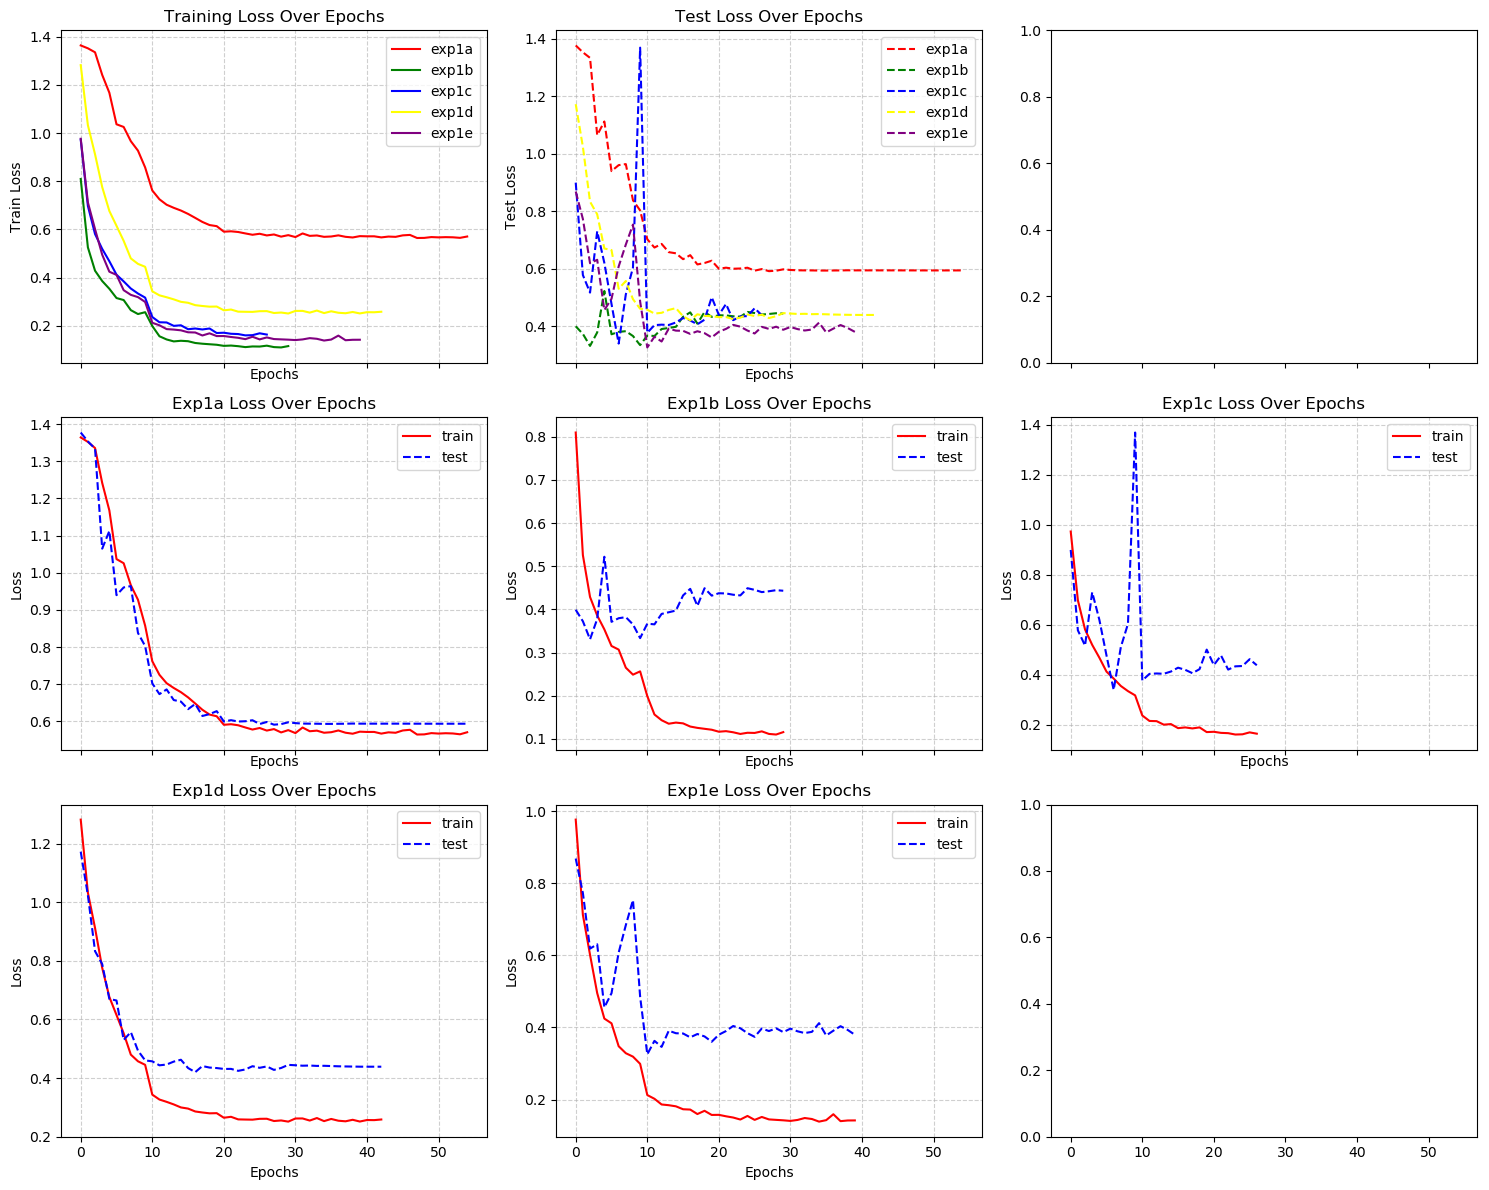

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12), sharex=True)

# ==============
# Train Loss Graph
ax1 = axes[0][0]
ax1.plot(exp1a_train, label='exp1a', color='red')
ax1.plot(exp1b_train, label='exp1b', color='green')
ax1.plot(exp1c_train, label='exp1c', color='blue')
ax1.plot(exp1d_train, label='exp1d', color='yellow')
ax1.plot(exp1e_train, label='exp1e', color='purple')

ax1.set_title('Training Loss Over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Train Loss')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# ==============
# Test Loss Graph
ax2 = axes[0][1]
ax2.plot(exp1a_val, label='exp1a', linestyle='--', color='red')
ax2.plot(exp1b_val, label='exp1b', linestyle='--', color='green')
ax2.plot(exp1c_val, label='exp1c', linestyle='--', color='blue')
ax2.plot(exp1d_val, label='exp1d', linestyle='--', color='yellow')
ax2.plot(exp1e_val, label='exp1e', linestyle='--', color='purple')

ax2.set_title('Test Loss Over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Loss')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

# ==============
# exp1a
ax = axes[1][0]
ax.plot(exp1a_train, label='train', color='red')
ax.plot(exp1a_val, label='test', linestyle='--', color='blue')

ax.set_title('Exp1a Loss Over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# ==============
# exp1b
ax = axes[1][1]
ax.plot(exp1b_train, label='train', color='red')
ax.plot(exp1b_val, label='test', linestyle='--', color='blue')

ax.set_title('Exp1b Loss Over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# ==============
# exp1c
ax = axes[1][2]
ax.plot(exp1c_train, label='train', color='red')
ax.plot(exp1c_val, label='test', linestyle='--', color='blue')

ax.set_title('Exp1c Loss Over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# ==============
# exp1d
ax = axes[2][0]
ax.plot(exp1d_train, label='train', color='red')
ax.plot(exp1d_val, label='test', linestyle='--', color='blue')

ax.set_title('Exp1d Loss Over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# ==============
# exp1e
ax = axes[2][1]
ax.plot(exp1e_train, label='train', color='red')
ax.plot(exp1e_val, label='test', linestyle='--', color='blue')

ax.set_title('Exp1e Loss Over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()